# Custom exploration of Eniac's database

In [247]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from Functions_module import check_table

sns.set_palette("pastel")

In [248]:
# orderlines_old = pd.read_csv('data/eniac/orderlines.csv')
# products_old = pd.read_csv('data/eniac/products.csv')
# orders_old = pd.read_csv('data/eniac/orders.csv')

In [249]:
orderlines = pd.read_csv('data/eniac/orderlines_cl_joan.csv')
products = pd.read_csv('data/eniac/products_cl_joan.csv')
orders = pd.read_csv('data/eniac/orders_cl_joan.csv')
brands = pd.read_csv('data/eniac/brands_cl_joan.csv')

In [250]:
orders['created_date'] = pd.to_datetime(orders['created_date'])
orderlines['date'] = pd.to_datetime(orderlines['date'])

# Hana

In [251]:
products_hana = products.copy()
orderlines_hana = orderlines.copy()
orders_hana = orders.copy()
brands_hana= brands.copy()

In [252]:
orders_hana.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204691 entries, 0 to 204690
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   order_id      204691 non-null  int64         
 1   created_date  204691 non-null  datetime64[ns]
 2   total_paid    204691 non-null  float64       
 3   state         204691 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 6.2+ MB


## How many orders are there?

In [253]:
orders_hana.order_id.nunique()

204691

## How many products are there?

In [254]:
products_hana.sku.nunique()

10579

## What period of time do these orders comprise?

In [255]:
orders_hana.created_date.agg(['min', 'max'])

min   2017-01-01 00:07:19
max   2018-03-14 13:58:36
Name: created_date, dtype: datetime64[ns]

## Creating categories

In [256]:
import re

In [257]:
products_hana = products.copy()

In [258]:
Mac = (r'^Apple Mac|^Apple iMac|^New Mac|^IMAC desktop|^desktop computer')

Accessories = (r'kensington|silicone|belt|deportiva|alarm|flypad|netcam|dell|celly|ik multimedia|glucÃ­metro|u2913wm dell 29 "ultrasharp fhd ips|scanner|netstream|webcam|bookarc|maleta|robot|blood pressure|netgear satellite|led|bracelet|gloves|polaroid|thermometer|home music|living colors|pocket|game capture|laser|scale|detector|gopro|pointer|riser|stylus|cleaner|case|fairbrush|backpack|casing|briefcase|camera|headphones|headset|keyboard|microphone|minidp|monitor|mouse|pen|pencil|screen protector|sleeve|speaker|stand|star wars|station|support|thermostat|apple tv|drone|lamp|p2418d|radiator|stabilizer|keypad|bag|cover')

iPad = (r'ipad')

iPhone = (r'iphone')

Licenses_and_waranties = (r'siri|parallels desktop|quarkpress|microsoft office|repair|adobe|applecare|license|protection|software|installation')

Open_or_refurbished = (r'^\(OPEN\)|^Open|Like New|refurbished|used|second hand')

Other_devices = (r'tablet|wacom intuos|ninebot|wacom cintiq|wacom mobilestudio')

Parts = (r'siren|devolo|hirise|hoco|startech|access point|replacement|bike|ifixit|bell|sonar fish|linksys|newertech|control|photo|hotspot|sonos|locator keys|alarm system|accelsior|video capture|smart plug|spare ball|calibrator|locator bluetooth|security|devolo dlan 500av|router|airport|lock|adapter|battery|box|bulb|cable|charger|cleanser|converter|dimmer|displayport|dock|kit|lightstrips|rack|raid|sensor|sonnet|allegro|startech hdmi|subwoofer|superdrive|switch|usb-c to|glass|charging|dock|hub|powercube|tools|ups|wireless base|ports|lightning|powerhouse base|nonda mini|satechi multiport|adapatdor')

Storage = (r'seagate|sshd|(wd red)|(drobo b810i iscsi san 8 bays)|(western digital)|(owc mercury)|(external enclosure)|thunderbolt|4tb|sdhc|samsung pro|sdhc|(lexar premium sdhc)|(newertech ministack)|(electra 6g ssd 960gb)|jumpdrive|passport|(wd blue 500gb)|nas|20tb|(256gb samsung)|(512gb samsung ssd)|3tb|8tb|capsule|datatraveler|(disk 500gb)|(hard disk)|(hard drive)|memory|qnap|rackstation|rugged|sandisk|samsung|server|transcend|crucial|cloud|(storage unit)|pendrive|hypedrive|ssynology')

iPod = (r'ipod')

Smartwatch = (r'withings|watch|fitbit')

In [259]:
# products_hana = products_hana.drop('Category',axis =1)

In [260]:
# products_hana

In [261]:
import numpy as np


products_hana = products_hana.assign(Category = '')

condlist = [
            products_hana.name.str.contains(Open_or_refurbished, case=False, regex = True),
            (((products_hana.sku.str[0:3] == 'APP')|(products_hana.sku.str[0:3] == 'PAC')) & (products_hana.name.str.contains(Mac, case=False, regex = True))),
            products_hana.name.str.contains(Smartwatch, case=False, regex = True),
            ((products_hana.name.str.contains(Parts, case=False, regex = True)) & (products_hana.price < 100)),
            products_hana.name.str.contains(Parts, case=False, regex = True),
            ((products_hana.name.str.contains(Accessories, case=False, regex = True)) & (products_hana.price < 200)),
            products_hana.name.str.contains(Accessories, case=False, regex = True),
            products_hana.name.str.contains(Licenses_and_waranties, case=False, regex = True),
            products_hana.name.str.contains(Other_devices, case=False, regex = True),
            ((products_hana.name.str.contains(Storage, case=False, regex = True)) & (products_hana.price < 500)),
            products_hana.name.str.contains(Storage, case=False, regex = True),
            products_hana.name.str.contains(iPad, case=False, regex = True),
            products_hana.name.str.contains(iPhone, case=False, regex = True),
            
            products_hana.name.str.contains(iPod, case=False, regex = True)
]

choicelist = [ 
            'Open or refurbished',
            'Mac',
            'Smartwatch',
            'Cheap parts',
            'Expensive parts',
            'Cheap Accessories',
            'Expensive Accessories',
            'Licenses_and_waranties',
            'Other_devices',
            'Cheap Storage',
            'Expensive storage',
            'iPad',
            'iPhone',
            
            'iPod'
]

products_hana.Category = np.select(condlist, choicelist, default='Uncategorized')

<ipython-input-261-2c829243a593>:16: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  ((products_hana.name.str.contains(Storage, case=False, regex = True)) & (products_hana.price < 500)),
<ipython-input-261-2c829243a593>:17: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  products_hana.name.str.contains(Storage, case=False, regex = True),


In [262]:
products_hana.groupby('Category').count()

,sku,name,desc,price
Category,,,,
Cheap Accessories,2265,2265,2265,2265
Cheap Storage,852,852,852,852
Cheap parts,1362,1362,1360,1362
Expensive Accessories,338,338,338,235
Expensive parts,871,871,871,736
Expensive storage,988,988,987,824
Licenses_and_waranties,158,158,158,109
Mac,1003,1003,1003,974
Open or refurbished,1660,1660,1656,1591


In [263]:
orderlines_orders_products_with_category = orderlines_hana.merge(orders,how='left').merge(products_hana,how='left')

In [264]:
apple_products=(
    products_hana[products_hana.sku.str[0:3] == 'APP']
    .sort_values('name')
    
    )

In [265]:
check_table =(
    products_hana
        .query("Category == 'Expensive parts'")
    
    )

In [266]:
check_table

,sku,name,desc,price,Category
34,TWS0019,Twelve South MagicWand support Apple Magic Tra...,MagicWand for wireless keyboard and Magic Trac...,NaN,Expensive parts
50,APP0367,Apple Mini DisplayPort to DVI Adapter Mac dual...,Adapter Mini Display Port to DVI dual channel ...,119.00,Expensive parts
66,MAK0008,Maclocks theft case iPad 2 3 and 4 black with ...,Case antitheft iPad 2 3 and 4 polycarbonate ro...,120.00,Expensive parts
67,MAK0007,Maclocks theft case iPad 2 3 and 4 transparent...,Case antitheft iPad 2 3 and 4 polycarbonate ro...,120.00,Expensive parts
74,SYN0051,Sliding Rail kit synology 2U sliding rails,Shelf rail kit Synology RackStation.,102.49,Expensive parts
...,...,...,...,...,...
10547,REP0419,iPhone charging connector repair 7,Repair service including parts and labor for i...,NaN,Expensive parts
10555,REP0420,Repair iPhone charging connector 7 Plus,Repair service including parts and labor for i...,NaN,Expensive parts
10561,REP0406,battery repair iPad Air,Battery Repair Service includes parts and labo...,NaN,Expensive parts
10566,REP0421,iPad charging connector repair,Repair service including parts and labor for iPad,NaN,Expensive parts


In [267]:
check_table.to_csv('data/eniac/export.csv')

### Revenue by categories

In [268]:
revenue_by_categories = (
        orderlines_orders_products_with_category
            .query("state == 'Completed'")
            .groupby('Category')
            .sum('total_sum')
            .reset_index()
            .sort_values('total_sum')
)

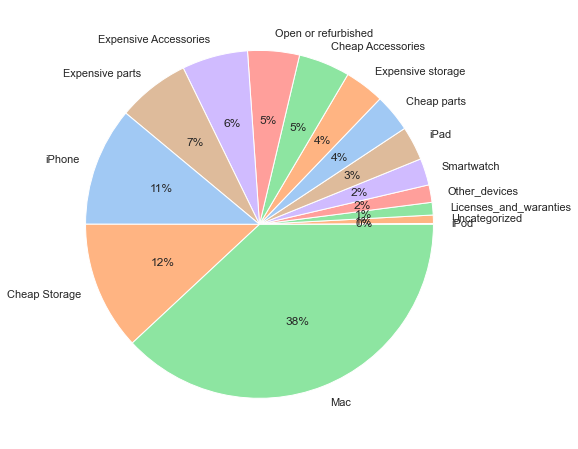

In [269]:
plt.subplots(figsize=(12, 8))
colors = sns.color_palette('pastel')[0:6]
plt.pie(revenue_by_categories.total_sum, labels = revenue_by_categories.Category, colors = colors, autopct='%.0f%%')
plt.show()

### Price by categories

In [270]:
# sns.set_theme(style="whitegrid")
# plt.subplots(figsize=(25, 8))
# sns.boxplot(data=price_distribution_categories, x='price', y='Category', color='dodgerblue')

# plt.xlim(0, 6000)
# plt.xlabel('Price')
# plt.ylabel('Category')
# plt.title('Price by categories')
# plt.show()

## How many orders are Completed?

In [271]:
completed_orders = orders_hana.loc[orders_hana.state == 'Completed']

In [272]:
orders_hana.loc[orders_hana.state == 'Completed'].state.value_counts() / orders_hana.order_id.count()

Completed    0.227465
Name: state, dtype: float64

Completed orders make 20% of all orders

In [273]:
orders_by_state=(
    orders_hana
    .groupby('state')
    .count()
    .reset_index()
)

In [274]:
orders_by_state

,state,order_id,created_date,total_paid
0,Cancelled,7192,7192,7192
1,Completed,46560,46560,46560
2,Pending,14361,14361,14361
3,Place Order,28579,28579,28579
4,Shopping Basket,107999,107999,107999


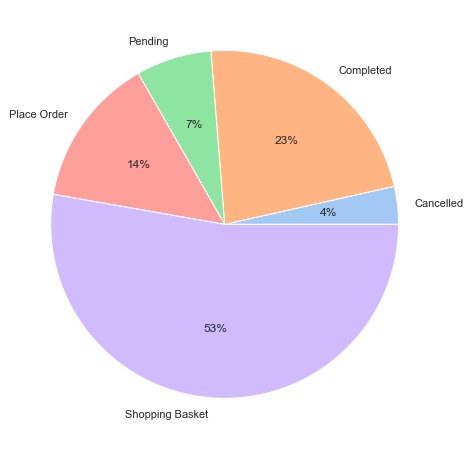

In [275]:
plt.subplots(figsize=(12, 8))
colors = sns.color_palette('pastel')[0:6]
plt.pie(orders_by_state.order_id, labels = orders_by_state.state, colors = colors, autopct='%.0f%%')
plt.show()

## Revenue by brands

In [276]:
products_brands =(
    products_hana.assign(short = products_hana.sku.str[0:3])
            .merge(brands,how='left')

)

In [277]:
orderlines_products_brands = (
    orderlines_hana
            .merge(products_brands,how='left')
)

In [278]:
orderlines_products_brands_orders = (
    orderlines_products_brands
                .merge(orders_hana,how='left')
)

In [279]:
completed_orders_big_merge = (
    orderlines_products_brands_orders
        .query("state == 'Completed'")
        .groupby('long')
        .sum('total_sum')
        .reset_index()
        .sort_values('total_sum', ascending = False)
)

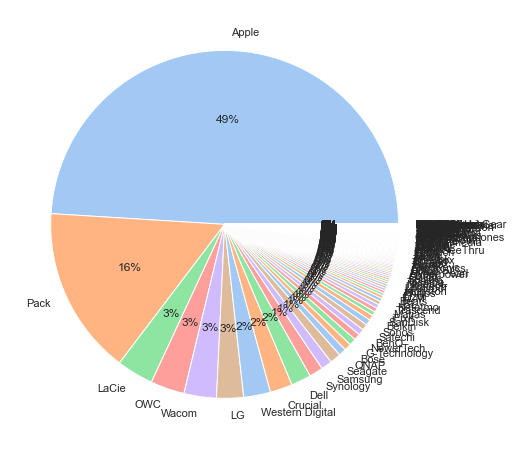

In [280]:
plt.subplots(figsize=(12, 8))
colors = sns.color_palette('pastel')[0:6]
plt.pie(completed_orders_big_merge.total_sum, labels = completed_orders_big_merge['long'], colors = colors, autopct='%.0f%%')
plt.show()

In [281]:
completed_orders_big_merge_by_product = (
    orderlines_products_brands_orders
        .query("state == 'Completed'")
        .groupby('sku')
        .sum('total_sum')
        .reset_index()
        .sort_values('total_paid', ascending = False)
    .head(1000)
)

In [282]:
completed_orders_big_merge_by_product.total_sum.sum()

12394095.680000002

In [283]:
list_of_products = completed_orders_big_merge_by_product.sku.tolist()

In [284]:
products_for_explore = products_hana[products_hana.sku.isin(list_of_products)]

## Discounts

### Exploration by states

In [285]:
cov_rate_weeks = (
    orders_hana
            .assign(week = orders_hana.created_date.dt.strftime('%W'))
            .assign(year = orders_hana.created_date.dt.strftime('%Y'))
            .groupby(['week','year','state'])
            .count()
            .reset_index()
            .sort_values(['year','week'])
)
cov_rate_weeks = (cov_rate_weeks
            .assign(week_n_orders = lambda x : x.groupby(['year','week'])['order_id'].transform('sum'))
            
)
cov_rate_weeks = (cov_rate_weeks
                 .assign(percentage = round(cov_rate_weeks.order_id / cov_rate_weeks.week_n_orders *100,2))
                 )
cov_rate_weeks_completed = (cov_rate_weeks
                  .query("state == 'Completed'")
                   
                 )
cov_rate_weeks_notcompleted = (cov_rate_weeks
                  .query("state != 'Completed'")
                
                 )

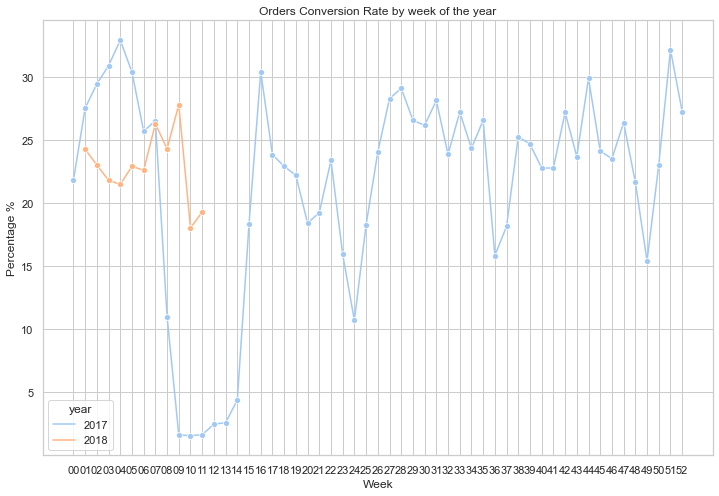

In [286]:
plt.subplots(figsize=(12, 8))
sns.set_palette("pastel")
sns.lineplot(data = cov_rate_weeks_completed, x='week', y = 'percentage',hue='year',marker='o')

plt.xlabel('Week')
plt.ylabel('Percentage %')
plt.title('Orders Conversion Rate by week of the year')
plt.show()

In [287]:
products_orderlines =(
        orderlines_hana.merge(products_hana,how='left')
                    .merge(orders_hana,how='left')
)

In [288]:
discounts_by_month = (
    orderlines_orders_products_with_category
                    .query("state == 'Completed'")
                    .query("(Category == 'Mac') | (Category == 'Cheap Storage') | (Category == 'iPhone') | (Category == 'Expensive parts')")
                    .assign(discount = (1 - orderlines_orders_products_with_category.unit_price / orderlines_orders_products_with_category.price)*100 )
                    .assign(month = orderlines_orders_products_with_category.created_date.dt.strftime('%B'))
                    .assign(year = orderlines_orders_products_with_category.created_date.dt.strftime('%Y'))
                    .assign(monthIndex = orderlines_orders_products_with_category.created_date.dt.strftime('%m'))
                    .query("year == '2017'")
                    .groupby(['month','monthIndex','Category'])
                    .agg({'discount':'mean'})
                    .sort_values(['monthIndex'])
                    .reset_index()
)

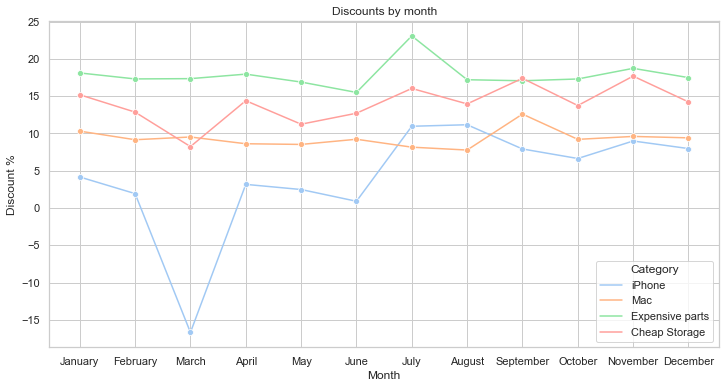

In [289]:
plt.subplots(figsize=(12, 6))
sns.set_palette("pastel")
sns.lineplot(data = discounts_by_month, x='month', y = 'discount',hue='Category',marker='o')

plt.xlabel('Month')
plt.ylabel('Discount %')
plt.title('Discounts by month')
plt.show()

## Revenue by month

In [290]:
revenue_by_month = (
    orderlines_orders_products_with_category
            .query("state == 'Completed'")
            .query("(Category == 'Mac') | (Category == 'Expensive parts') | (Category == 'Cheap Storage') | (Category == 'iPhone')")
            .assign(month = orderlines_orders_products_with_category.created_date.dt.strftime('%B'))
            .assign(year = orderlines_orders_products_with_category.created_date.dt.strftime('%Y'))
            .assign(monthIndex = orderlines_orders_products_with_category.created_date.dt.strftime('%m'))
            .query("year == '2017'")
            .groupby(['month','monthIndex','Category'])
            .agg({'total_sum':'sum'})
    
            .sort_values(['monthIndex'])
            .reset_index()
                        
)

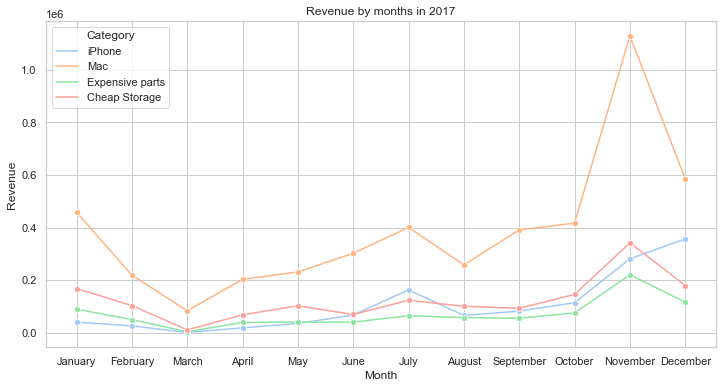

In [291]:

    plt.subplots(figsize=(12,6))

    sns.lineplot(data = revenue_by_month, x='month', y = 'total_sum',hue='Category',marker='o')

    plt.xlabel('Month')
    plt.ylabel('Revenue')
    plt.title('Revenue by months in 2017')
    plt.show()

### Discount by week for top 4 categories

In [292]:
discount_by_weeks = (
    orderlines_orders_products_with_category
            .query("state == 'Completed'")
            .query("(Category == 'Mac') | (Category == 'Expensive parts') | (Category == 'Cheap Storage') | (Category == 'iPhone')")
            .assign(discount = (1 - orderlines_orders_products_with_category.unit_price / orderlines_orders_products_with_category.price)*100 )
            .assign(week = orderlines_orders_products_with_category.created_date.dt.strftime('%W'))
            .assign(year = orderlines_orders_products_with_category.created_date.dt.strftime('%Y'))
            .query("year == '2017'")
            .groupby(['week','Category'])
            .agg({'discount':'mean'})
            .reset_index()
            .sort_values(['week'])
)
          


In [293]:
# discount_by_weeks

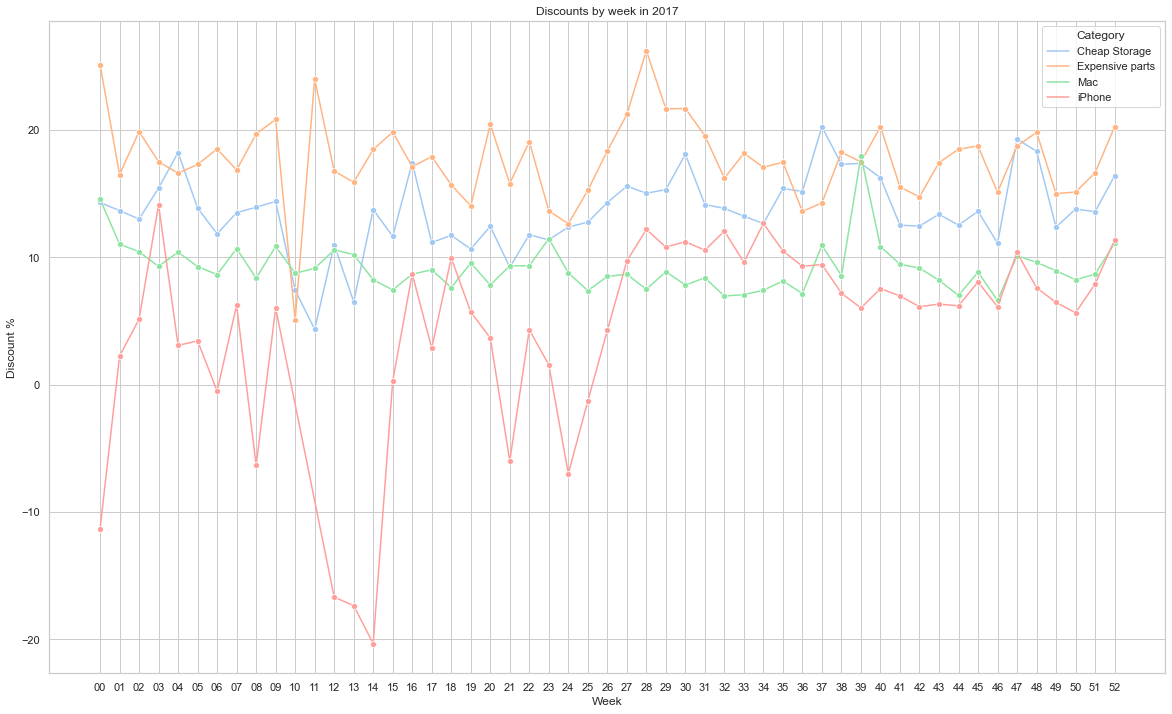

In [294]:

    plt.subplots(figsize=(20,12))

    sns.lineplot(data = discount_by_weeks, x='week', y = 'discount',hue='Category',marker='o')

    plt.xlabel('Week')
    plt.ylabel('Discount %')
    plt.title('Discounts by week in 2017')
    plt.show()

### Revenue by week for top 4 categories

In [295]:
discount_by_weeks = (
    orderlines_orders_products_with_category
            .query("state == 'Completed'")
            .query("(Category == 'Mac') | (Category == 'Expensive parts') | (Category == 'Cheap Storage') | (Category == 'iPhone')")
            .assign(week = orderlines_orders_products_with_category.created_date.dt.strftime('%W'))
            .assign(year = orderlines_orders_products_with_category.created_date.dt.strftime('%Y'))
            .query("year == '2017'")
            .groupby(['week','Category'])
            .agg({'total_sum':'sum'})
            .reset_index()
            .sort_values(['week'])
)
          


In [296]:
# discount_by_weeks

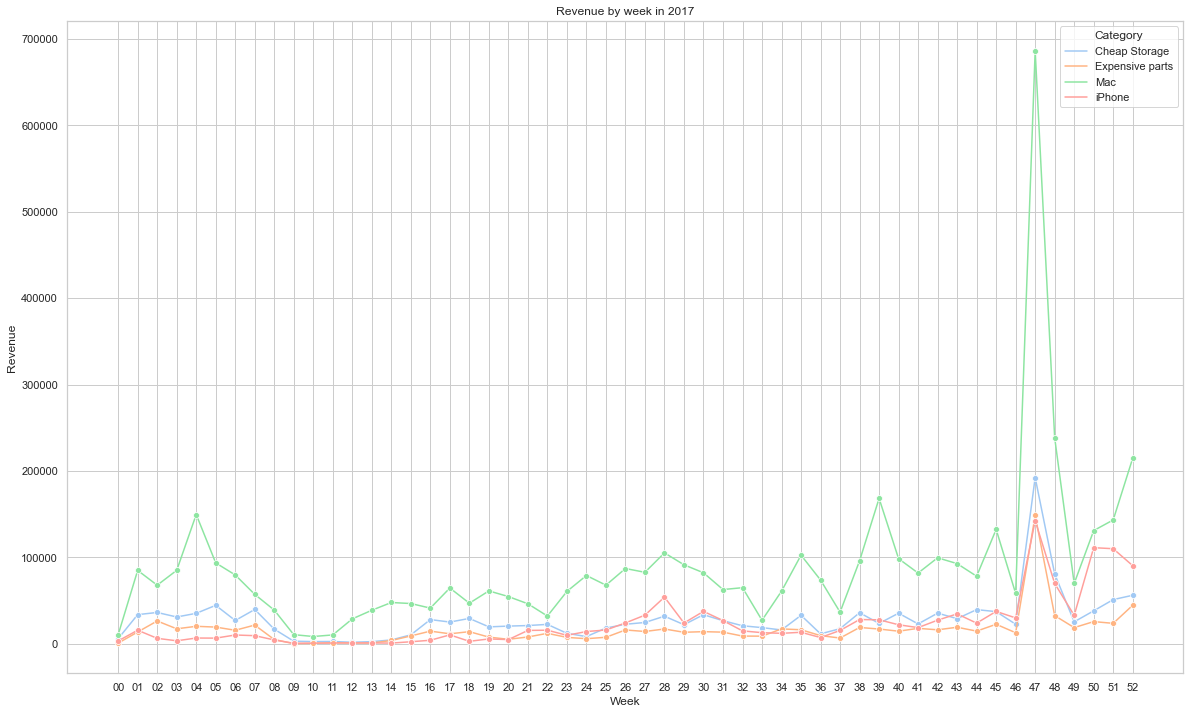

In [297]:

    plt.subplots(figsize=(20,12))

    sns.lineplot(data = discount_by_weeks, x='week', y = 'total_sum',hue='Category',marker='o')

    plt.xlabel('Week')
    plt.ylabel('Revenue')
    plt.title('Revenue by week in 2017')
    plt.show()

why iphones have bigger prices

In [298]:
iphone_explore_march = (
        orderlines_orders_products_with_category
                .query("Category == 'iPhone'")
                .query("(created_date > '2017-01-01')&(created_date < '2017-02-01')")
)
iphone_explore_march = iphone_explore_march[iphone_explore_march.name.str.startswith('New Apple iPhone')]
# iphone_explore_march
order_ids_for_march = iphone_explore_march.order_id.tolist()

In [299]:
(iphone_explore_march
    .groupby(['state'])
    .agg({'product_quantity':'sum'})
     .reset_index()
     .sort_values('product_quantity', ascending= False)
).head(50)

,state,product_quantity


In [300]:
orders_with_iphones = orderlines_orders_products_with_category[orderlines_orders_products_with_category.order_id.isin(order_ids_for_march)]

In [301]:
orders_with_iphones.sort_values('order_id')

,order_id,product_quantity,sku,unit_price,date,total_sum,created_date,total_paid,state,name,desc,price,Category


In [302]:
explore_march_completed = (
        orderlines_orders_products_with_category
                .query("state == 'Pending'")
                .query("(created_date > '2017-03-21')&(created_date < '2017-04-16')")
                .groupby('Category')
                .count()
)

In [303]:
explore_march_completed

,order_id,product_quantity,sku,unit_price,date,total_sum,created_date,total_paid,state,name,desc,price
Category,,,,,,,,,,,,
Cheap Accessories,566,566,566,566,566,566,566,566,566,566,566,566
Cheap Storage,532,532,532,532,532,532,532,532,532,532,532,532
Cheap parts,668,668,668,668,668,668,668,668,668,668,668,668
Expensive Accessories,89,89,89,89,89,89,89,89,89,89,89,82
Expensive parts,203,203,203,203,203,203,203,203,203,203,203,183
Expensive storage,72,72,72,72,72,72,72,72,72,72,72,48
Licenses_and_waranties,41,41,41,41,41,41,41,41,41,41,41,39
Mac,117,117,117,117,117,117,117,117,117,117,117,117
Open or refurbished,112,112,112,112,112,112,112,112,112,112,112,104


### Number of orders by week for top 4 categories

In [304]:
cov_rate_weeks = (
    orders_hana
            .assign(week = orders_hana.created_date.dt.strftime('%W'))
            .assign(year = orders_hana.created_date.dt.strftime('%Y'))
            .query("year == '2017'")
            .groupby(['week','state'])
            .count()
            .reset_index()
            .sort_values(['week'])
)
cov_rate_weeks = (cov_rate_weeks
            .assign(week_n_orders = lambda x : x.groupby(['week','state'])['order_id'].transform('sum'))
            
)


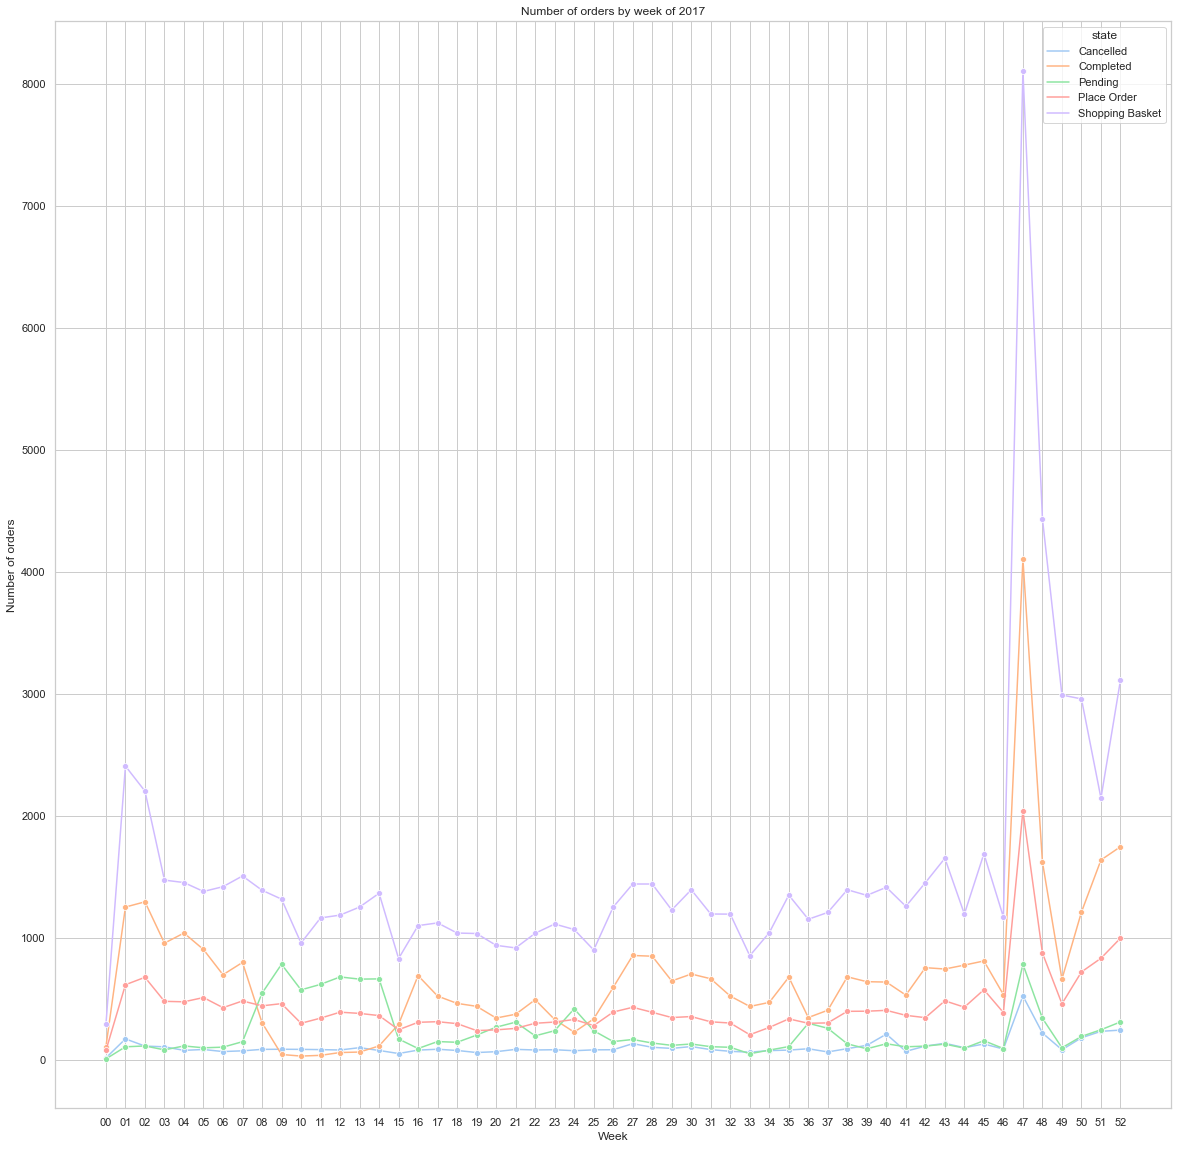

In [305]:

    plt.subplots(figsize=(20, 20))

    sns.lineplot(data = cov_rate_weeks, x='week', y = 'week_n_orders',hue='state',marker='o')

    plt.xlabel('Week')
    plt.ylabel('Number of orders')
    plt.title('Number of orders by week of 2017')
    plt.show()

### Corelation between Completed and Pending orders

In [306]:
cov_rate_weeks_completed_pending= (
        cov_rate_weeks
            .query("(state == 'Pending') | (state == 'Completed')")

)

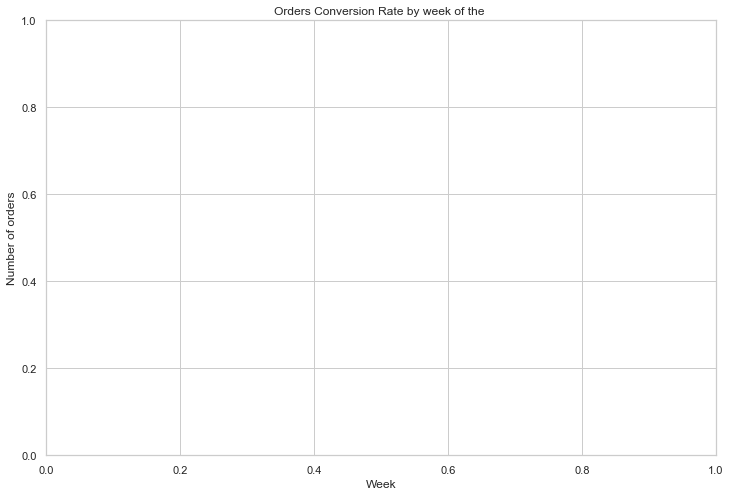

In [307]:

    plt.subplots(figsize=(12, 8))

    sns.lineplot(data = cov_rate_weeks_completed_pending.query("year == '2017'"), x='week', y = 'week_n_orders',hue='state',marker='o')

    plt.xlabel('Week')
    plt.ylabel('Number of orders')
    plt.title('Orders Conversion Rate by week of the ')
    plt.show()

### July?

In [311]:
(orderlines_orders_products_with_category
        .query("state == 'Completed'")
        .assign(days = orderlines_orders_products_with_category.created_date.dt.strftime('%d'))
        .assign(month = orderlines_orders_products_with_category.created_date.dt.strftime('%m'))
         .query("month == '07'")
        .groupby('days')
         .agg({'order_id':'count'})
)                                                               

,order_id
days,
01,92
02,66
03,178
04,141
05,306
06,161
07,187
08,69
09,125


# Sabrina

In [374]:
products_sabrina = products.copy()

In [375]:
brands_sabrina = brands.copy()

In [376]:
orders_sabrina = orders.copy()

In [377]:
orderlines_sabrina = orderlines.copy()

In [378]:
orderlines_sabrina = orderlines_sabrina.rename(columns={"order_id":"id_order"})

In [379]:
orderlines_sabrina

,id_order,product_quantity,sku,unit_price,date,total_sum
0,299539,1,OTT0133,18.99,2017-01-01 00:07:19,18.99
1,299540,1,LGE0043,399.00,2017-01-01 00:19:45,399.00
2,299541,1,PAR0071,474.05,2017-01-01 00:20:57,474.05
3,299542,1,WDT0315,68.39,2017-01-01 00:51:40,68.39
4,299543,1,JBL0104,23.74,2017-01-01 01:06:38,23.74
...,...,...,...,...,...,...
293738,527398,1,JBL0122,42.99,2018-03-14 13:57:25,42.99
293739,527399,1,PAC0653,141.58,2018-03-14 13:57:34,141.58
293740,527400,2,APP0698,9.99,2018-03-14 13:57:41,19.98
293741,527388,1,BEZ0204,19.99,2018-03-14 13:58:01,19.99


<h1><strong>PREPARATION DATA SET AND DATA FRAMES</strong><h1>

<strong>Create categories products<strong>

In [380]:
products_sabrina.head()

,sku,name,desc,price
0,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99
1,APP0023,Apple Mac Keyboard Keypad Spanish,USB ultrathin keyboard Apple Mac Spanish.,59.00
2,APP0025,Mighty Mouse Apple Mouse for Mac,mouse Apple USB cable.,59.00
3,APP0072,Apple Dock to USB Cable iPhone and iPod white,IPhone dock and USB Cable Apple iPod.,25.00
4,KIN0007,Mac Memory Kingston 2GB 667MHz DDR2 SO-DIMM,2GB RAM Mac mini and iMac (2006/07) MacBook Pr...,34.99


In [381]:
Mac = (r'^Apple Mac|^Apple iMac|^New Mac|^IMAC desktop|^desktop computer')

Accessories = (r'kensington|silicone|belt|deportiva|alarm|flypad|netcam|dell|celly|ik multimedia|glucÃ­metro|u2913wm dell 29 "ultrasharp fhd ips|scanner|netstream|webcam|bookarc|maleta|robot|blood pressure|netgear satellite|led|bracelet|gloves|polaroid|thermometer|home music|living colors|pocket|game capture|laser|scale|detector|gopro|pointer|riser|stylus|cleaner|case|fairbrush|backpack|casing|briefcase|camera|headphones|headset|keyboard|microphone|minidp|monitor|mouse|pen|pencil|screen protector|sleeve|speaker|stand|star wars|station|support|thermostat|apple tv|drone|lamp|p2418d|radiator|stabilizer|keypad|bag|cover')

iPad = (r'ipad')

iPhone = (r'iphone')

Licenses_and_waranties = (r'siri|parallels desktop|quarkpress|microsoft office|repair|adobe|applecare|license|protection|software|installation')

Open_or_refurbished = (r'^\(OPEN\)|^Open|Like New|refurbished|used|second hand')

Other_devices = (r'tablet|wacom intuos|ninebot|wacom cintiq|wacom mobilestudio')

Parts = (r'siren|devolo|hirise|hoco|startech|access point|replacement|bike|ifixit|bell|sonar fish|linksys|newertech|control|photo|hotspot|sonos|locator keys|alarm system|accelsior|video capture|smart plug|spare ball|calibrator|locator bluetooth|security|devolo dlan 500av|router|airport|lock|adapter|battery|box|bulb|cable|charger|cleanser|converter|dimmer|displayport|dock|kit|lightstrips|rack|raid|sensor|sonnet|allegro|startech hdmi|subwoofer|superdrive|switch|usb-c to|glass|charging|dock|hub|powercube|tools|ups|wireless base|ports|lightning|powerhouse base|nonda mini|satechi multiport|adapatdor')

Storage = (r'seagate|sshd|(wd red)|(drobo b810i iscsi san 8 bays)|(western digital)|(owc mercury)|(external enclosure)|thunderbolt|4tb|sdhc|samsung pro|sdhc|(lexar premium sdhc)|(newertech ministack)|(electra 6g ssd 960gb)|jumpdrive|passport|(wd blue 500gb)|nas|20tb|(256gb samsung)|(512gb samsung ssd)|3tb|8tb|capsule|datatraveler|(disk 500gb)|(hard disk)|(hard drive)|memory|qnap|rackstation|rugged|sandisk|samsung|server|transcend|crucial|cloud|(storage unit)|pendrive|hypedrive|ssynology')

iPod = (r'ipod')

Smartwatch = (r'withings|watch|fitbit')


products_sabrina = products_sabrina.assign(category = '')

condlist = [
            products_sabrina.name.str.contains(Open_or_refurbished, case=False, regex = True),
            (((products_sabrina.sku.str[0:3] == 'APP')|(products_sabrina.sku.str[0:3] == 'PAC')) & (products_sabrina.name.str.contains(Mac, case=False, regex = True))),
            products_sabrina.name.str.contains(Smartwatch, case=False, regex = True),
            ((products_sabrina.name.str.contains(Parts, case=False, regex = True)) & (products_sabrina.price < 100)),
            products_sabrina.name.str.contains(Parts, case=False, regex = True),
            ((products_sabrina.name.str.contains(Accessories, case=False, regex = True)) & (products_sabrina.price < 200)),
            products_sabrina.name.str.contains(Accessories, case=False, regex = True),
            products_sabrina.name.str.contains(Licenses_and_waranties, case=False, regex = True),
            products_sabrina.name.str.contains(Other_devices, case=False, regex = True),
            ((products_sabrina.name.str.contains(Storage, case=False, regex = True)) & (products_sabrina.price < 500)),
            products_sabrina.name.str.contains(Storage, case=False, regex = True),
            products_sabrina.name.str.contains(iPad, case=False, regex = True),
            products_sabrina.name.str.contains(iPhone, case=False, regex = True), 
            
            products_sabrina.name.str.contains(iPod, case=False, regex = True)
]

choicelist = [ 
            'Open or refurbished',
            'Mac',
            'Smartwatch',
            'Cheap parts',
            'Expensive parts',
            'Cheap Accessories',
            'Expensive Accessories',
            'Licenses_and_waranties',
            'Other_devices',
            'Cheap Storage',
            'Expensive storage',
            'iPad',
            'iPhone',
            
            'iPod'
]

products_sabrina.category = np.select(condlist, choicelist, default='Uncategorized')

<ipython-input-381-f81e446ca2a6>:36: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  ((products_sabrina.name.str.contains(Storage, case=False, regex = True)) & (products_sabrina.price < 500)),
<ipython-input-381-f81e446ca2a6>:37: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  products_sabrina.name.str.contains(Storage, case=False, regex = True),


<strong>Create discount products/orderlines<strong>

In [382]:
orderlines_products_sabrina =orderlines_sabrina.merge(products_sabrina,how='left')

In [383]:
orderlines_products_sabrina['Discount'] =(orderlines_products_sabrina['unit_price']*100)/orderlines_products_sabrina['price']

In [384]:
orderlines_products_sabrina['Discount']= 100-(orderlines_products_sabrina['Discount']).round(decimals=0)

In [385]:
orderlines_products_sabrina.head()

,id_order,product_quantity,sku,unit_price,date,total_sum,name,desc,price,category,Discount
0,299539,1,OTT0133,18.99,2017-01-01 00:07:19,18.99,Otterbox iPhone Case Symmetry 2.0 SE / 5s / 5 ...,resistant cover and thin beveled edges for iPh...,34.99,Cheap parts,46.0
1,299540,1,LGE0043,399.00,2017-01-01 00:19:45,399.00,"27UD58-B LG Monitor 27 ""4K UHD DisplayPort",Monitor for gamers and multimedia professional...,429.00,Expensive parts,7.0
2,299541,1,PAR0071,474.05,2017-01-01 00:20:57,474.05,Parrot Bebop 2 White + Command FLYPAD and FPV ...,cuadricóptero wireless remote control with 25 ...,699.00,Expensive parts,32.0
3,299542,1,WDT0315,68.39,2017-01-01 00:51:40,68.39,"Blue WD 2TB Hard Drive 35 ""Mac and PC",Internal Hard Drive Western Digital 2TB 3.5-in...,79.00,Cheap Storage,13.0
4,299543,1,JBL0104,23.74,2017-01-01 01:06:38,23.74,Gray Bluetooth Speaker JBL GO,Compact Bluetooth Handsfree for iPhone iPad an...,29.90,Cheap Accessories,21.0


<strong>Create discount range products/orderlines<strong>

In [386]:
orderlines_products_sabrina = orderlines_products_sabrina.assign(discount_range = '')

condlist = [
            ((orderlines_products_sabrina.Discount > -1) & (orderlines_products_sabrina.Discount <1 )),
            (orderlines_products_sabrina.Discount <= 10),
            (orderlines_products_sabrina.Discount <=20),
            (orderlines_products_sabrina.Discount <=50),
            (orderlines_products_sabrina.Discount >50)
]

choicelist = [
            
            '0%',
            '1% -10%',
            '11% -20%',
            '21% -50%',
            'Over 50%'
            
]

orderlines_products_sabrina.discount_range = np.select(condlist, choicelist, default='-')

In [387]:
orderlines_products_sabrina.head()

,id_order,product_quantity,sku,unit_price,date,total_sum,name,desc,price,category,Discount,discount_range
0,299539,1,OTT0133,18.99,2017-01-01 00:07:19,18.99,Otterbox iPhone Case Symmetry 2.0 SE / 5s / 5 ...,resistant cover and thin beveled edges for iPh...,34.99,Cheap parts,46.0,21% -50%
1,299540,1,LGE0043,399.00,2017-01-01 00:19:45,399.00,"27UD58-B LG Monitor 27 ""4K UHD DisplayPort",Monitor for gamers and multimedia professional...,429.00,Expensive parts,7.0,1% -10%
2,299541,1,PAR0071,474.05,2017-01-01 00:20:57,474.05,Parrot Bebop 2 White + Command FLYPAD and FPV ...,cuadricóptero wireless remote control with 25 ...,699.00,Expensive parts,32.0,21% -50%
3,299542,1,WDT0315,68.39,2017-01-01 00:51:40,68.39,"Blue WD 2TB Hard Drive 35 ""Mac and PC",Internal Hard Drive Western Digital 2TB 3.5-in...,79.00,Cheap Storage,13.0,11% -20%
4,299543,1,JBL0104,23.74,2017-01-01 01:06:38,23.74,Gray Bluetooth Speaker JBL GO,Compact Bluetooth Handsfree for iPhone iPad an...,29.90,Cheap Accessories,21.0,21% -50%


<strong>Merging orderlines_products_sabrina with orders for state <strong>

In [388]:
orderlines_products_sabrina.merge(orders_sabrina, how='left', left_on='id_order', right_on='order_id')

,id_order,product_quantity,sku,unit_price,date,total_sum,name,desc,price,category,Discount,discount_range,order_id,created_date,total_paid,state
0,299539,1,OTT0133,18.99,2017-01-01 00:07:19,18.99,Otterbox iPhone Case Symmetry 2.0 SE / 5s / 5 ...,resistant cover and thin beveled edges for iPh...,34.99,Cheap parts,46.0,21% -50%,299539,2017-01-01 00:07:19,18.99,Shopping Basket
1,299540,1,LGE0043,399.00,2017-01-01 00:19:45,399.00,"27UD58-B LG Monitor 27 ""4K UHD DisplayPort",Monitor for gamers and multimedia professional...,429.00,Expensive parts,7.0,1% -10%,299540,2017-01-01 00:19:45,399.00,Shopping Basket
2,299541,1,PAR0071,474.05,2017-01-01 00:20:57,474.05,Parrot Bebop 2 White + Command FLYPAD and FPV ...,cuadricóptero wireless remote control with 25 ...,699.00,Expensive parts,32.0,21% -50%,299541,2017-01-01 00:20:57,474.05,Shopping Basket
3,299542,1,WDT0315,68.39,2017-01-01 00:51:40,68.39,"Blue WD 2TB Hard Drive 35 ""Mac and PC",Internal Hard Drive Western Digital 2TB 3.5-in...,79.00,Cheap Storage,13.0,11% -20%,299542,2017-01-01 00:51:40,68.39,Shopping Basket
4,299543,1,JBL0104,23.74,2017-01-01 01:06:38,23.74,Gray Bluetooth Speaker JBL GO,Compact Bluetooth Handsfree for iPhone iPad an...,29.90,Cheap Accessories,21.0,21% -50%,299543,2017-01-01 01:06:38,23.74,Shopping Basket
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293738,527398,1,JBL0122,42.99,2018-03-14 13:57:25,42.99,JBL T450 BT Bluetooth Headset Black,Wireless headphones with folding design with 1...,49.95,Cheap Accessories,14.0,11% -20%,527398,2018-03-14 13:57:25,42.99,Shopping Basket
293739,527399,1,PAC0653,141.58,2018-03-14 13:57:34,141.58,Samsung SSD 850 expansion kit EVO 250GB + Data...,SSD upgrade kit 2008-2010 250 GB MacBook and M...,215.98,Expensive parts,34.0,21% -50%,527399,2018-03-14 13:57:34,141.58,Shopping Basket
293740,527400,2,APP0698,9.99,2018-03-14 13:57:41,19.98,Apple Lightning Cable Connector to USB 1m Whit...,Apple Lightning USB Cable 1 meter to charge an...,25.00,Cheap parts,60.0,Over 50%,527400,2018-03-14 13:57:41,19.98,Shopping Basket
293741,527388,1,BEZ0204,19.99,2018-03-14 13:58:01,19.99,"Be.ez LArobe Case Mix Macbook 12 ""Green",Macbook thin sheath 12 inches.,29.99,Cheap Accessories,33.0,21% -50%,527388,2018-03-14 13:51:59,34.98,Shopping Basket


In [389]:
orderlines_products_orders_sabrina=orderlines_products_sabrina.merge(orders_sabrina, how='left', left_on='id_order', right_on='order_id')

In [391]:
orderlines_products_orders_sabrina=orderlines_products_orders_sabrina.drop(['created_date','order_id','desc'],axis=1)

In [392]:
orderlines_products_orders_sabrina.head()

,id_order,product_quantity,sku,unit_price,date,total_sum,name,price,category,Discount,discount_range,total_paid,state
0,299539,1,OTT0133,18.99,2017-01-01 00:07:19,18.99,Otterbox iPhone Case Symmetry 2.0 SE / 5s / 5 ...,34.99,Cheap parts,46.0,21% -50%,18.99,Shopping Basket
1,299540,1,LGE0043,399.00,2017-01-01 00:19:45,399.00,"27UD58-B LG Monitor 27 ""4K UHD DisplayPort",429.00,Expensive parts,7.0,1% -10%,399.00,Shopping Basket
2,299541,1,PAR0071,474.05,2017-01-01 00:20:57,474.05,Parrot Bebop 2 White + Command FLYPAD and FPV ...,699.00,Expensive parts,32.0,21% -50%,474.05,Shopping Basket
3,299542,1,WDT0315,68.39,2017-01-01 00:51:40,68.39,"Blue WD 2TB Hard Drive 35 ""Mac and PC",79.00,Cheap Storage,13.0,11% -20%,68.39,Shopping Basket
4,299543,1,JBL0104,23.74,2017-01-01 01:06:38,23.74,Gray Bluetooth Speaker JBL GO,29.90,Cheap Accessories,21.0,21% -50%,23.74,Shopping Basket


<strong>Adjust date <strong>

In [393]:
orderlines_products_orders_sabrina['date']=pd.to_datetime(orderlines_products_orders_sabrina['date'])

In [394]:
orderlines_products_orders_sabrina =orderlines_products_orders_sabrina.assign(year = orderlines_products_orders_sabrina['date'].dt.strftime('%Y'))

In [395]:
orderlines_products_orders_sabrina=orderlines_products_orders_sabrina.assign(month = orderlines_products_orders_sabrina['date'].dt.strftime('%b'))

In [396]:
orderlines_products_orders_sabrina.head()

,id_order,product_quantity,sku,unit_price,date,total_sum,name,price,category,Discount,discount_range,total_paid,state,year,month
0,299539,1,OTT0133,18.99,2017-01-01 00:07:19,18.99,Otterbox iPhone Case Symmetry 2.0 SE / 5s / 5 ...,34.99,Cheap parts,46.0,21% -50%,18.99,Shopping Basket,2017,Jan
1,299540,1,LGE0043,399.00,2017-01-01 00:19:45,399.00,"27UD58-B LG Monitor 27 ""4K UHD DisplayPort",429.00,Expensive parts,7.0,1% -10%,399.00,Shopping Basket,2017,Jan
2,299541,1,PAR0071,474.05,2017-01-01 00:20:57,474.05,Parrot Bebop 2 White + Command FLYPAD and FPV ...,699.00,Expensive parts,32.0,21% -50%,474.05,Shopping Basket,2017,Jan
3,299542,1,WDT0315,68.39,2017-01-01 00:51:40,68.39,"Blue WD 2TB Hard Drive 35 ""Mac and PC",79.00,Cheap Storage,13.0,11% -20%,68.39,Shopping Basket,2017,Jan
4,299543,1,JBL0104,23.74,2017-01-01 01:06:38,23.74,Gray Bluetooth Speaker JBL GO,29.90,Cheap Accessories,21.0,21% -50%,23.74,Shopping Basket,2017,Jan


<strong>Create revenue column <strong>

In [397]:
orderlines_products_orders_sabrina['price']*orderlines_products_orders_sabrina['product_quantity']

0          34.99
1         429.00
2         699.00
3          79.00
4          29.90
           ...  
293738     49.95
293739    215.98
293740     50.00
293741     29.99
293742     35.00
Length: 293743, dtype: float64

In [398]:
orderlines_products_orders_sabrina['revenue']=orderlines_products_orders_sabrina['price']*orderlines_products_orders_sabrina['product_quantity']

In [399]:
orderlines_products_orders_sabrina.head()

,id_order,product_quantity,sku,unit_price,date,total_sum,name,price,category,Discount,discount_range,total_paid,state,year,month,revenue
0,299539,1,OTT0133,18.99,2017-01-01 00:07:19,18.99,Otterbox iPhone Case Symmetry 2.0 SE / 5s / 5 ...,34.99,Cheap parts,46.0,21% -50%,18.99,Shopping Basket,2017,Jan,34.99
1,299540,1,LGE0043,399.00,2017-01-01 00:19:45,399.00,"27UD58-B LG Monitor 27 ""4K UHD DisplayPort",429.00,Expensive parts,7.0,1% -10%,399.00,Shopping Basket,2017,Jan,429.00
2,299541,1,PAR0071,474.05,2017-01-01 00:20:57,474.05,Parrot Bebop 2 White + Command FLYPAD and FPV ...,699.00,Expensive parts,32.0,21% -50%,474.05,Shopping Basket,2017,Jan,699.00
3,299542,1,WDT0315,68.39,2017-01-01 00:51:40,68.39,"Blue WD 2TB Hard Drive 35 ""Mac and PC",79.00,Cheap Storage,13.0,11% -20%,68.39,Shopping Basket,2017,Jan,79.00
4,299543,1,JBL0104,23.74,2017-01-01 01:06:38,23.74,Gray Bluetooth Speaker JBL GO,29.90,Cheap Accessories,21.0,21% -50%,23.74,Shopping Basket,2017,Jan,29.90


<h1>Considerations:</h1>

<h>1.Company revenue comes from which category<br> 2.How many orders have the top 5 categories?<br>3.How many orders come from other categories?And in which discount range are?<br> 4.Which discount range segment brings more revenue? <br> 5.Is there a correlation between discount and number of orders?  </h> 

<h><strong>1.Company revenue comes from which category</strong></h>

In [400]:
company_revenue=orderlines_products_orders_sabrina.query('state=="Completed"')

In [401]:
company_revenue=company_revenue.query('year=="2017"')

In [402]:
company_revenue=company_revenue[['category','revenue']]

In [403]:
company_revenue=company_revenue.groupby('category').revenue.sum().sort_values(ascending=False).reset_index()

In [404]:
pd.options.display.float_format = '{:.2f}'.format

In [405]:
company_revenue=company_revenue.sort_values(by='revenue',ascending=False)

In [406]:
company_revenue

,category,revenue
0,Mac,5234911.76
1,Cheap Storage,1765580.66
2,iPhone,1210940.98
3,Expensive parts,982994.11
4,Expensive Accessories,871944.40
5,Cheap Accessories,784037.06
6,Open or refurbished,758017.46
7,Cheap parts,561850.87
8,Expensive storage,449456.78
9,iPad,385333.97


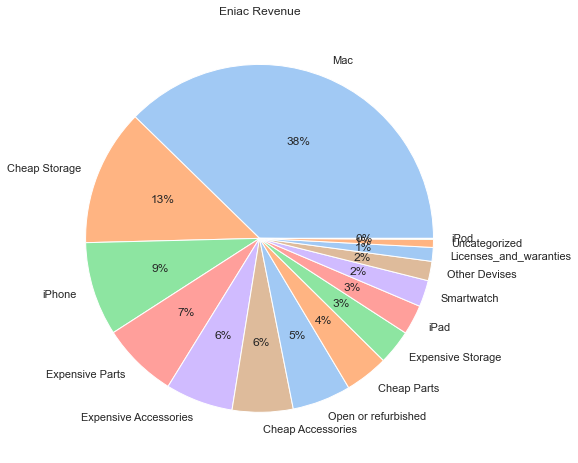

In [407]:
plt.subplots(figsize=(20, 8))
labels = ['Mac', 'Cheap Storage', 'iPhone','Expensive Parts','Expensive Accessories','Cheap Accessories','Open or refurbished','Cheap Parts','Expensive Storage', 'iPad','Smartwatch','Other Devises','Licenses_and_waranties','Uncategorized','iPod']
colors = sns.color_palette('pastel')[0:6]
plt.pie(company_revenue.revenue, labels=labels,colors = colors, autopct='%.0f%%')
plt.title('Eniac Revenue') 
plt.show()
plt.show()

<h><strong>2.How many orders have the top 5 categories?</strong></h>

In [408]:
discount_range_orders_top_5_categories=orderlines_products_orders_sabrina.query('state=="Completed"')

In [409]:
discount_range_orders_top_5_categories=discount_range_orders_top_5_categories.query('year=="2017"')

In [410]:
discount_range_orders_top_5_categories=discount_range_orders_top_5_categories.query("(category=='Mac')|(category=='Cheap Storage')|(category=='iPhone')|(category=='Expensive parts')|(category=='Expensive Accessories')")

In [411]:
discount_range_orders_top_5_categories=discount_range_orders_top_5_categories.groupby(['discount_range','category']).id_order.count().reset_index()

In [412]:
discount_range_orders_top_5_categories

,discount_range,category,id_order
0,-,Expensive Accessories,140
1,-,Expensive parts,261
2,-,iPhone,120
3,0%,Cheap Storage,283
4,0%,Expensive Accessories,36
5,0%,Expensive parts,99
6,0%,Mac,33
7,0%,iPhone,152
8,1% -10%,Cheap Storage,2954
9,1% -10%,Expensive Accessories,525


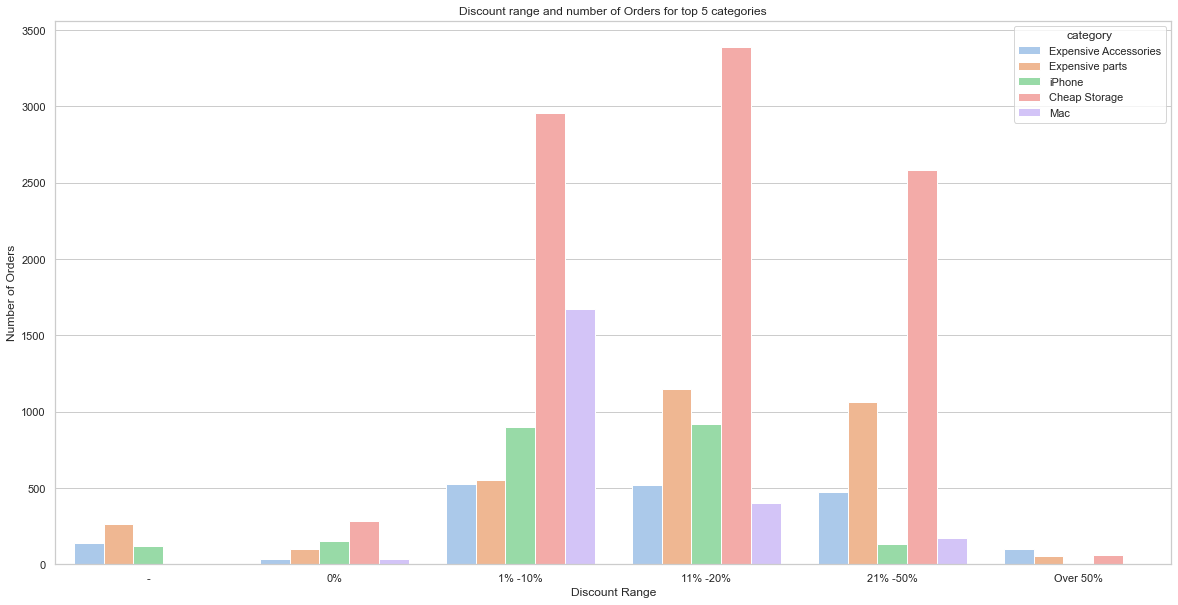

In [413]:
plt.subplots(figsize=(20, 10))
colors = sns.color_palette('pastel')[0:6]
sns.barplot(data=discount_range_orders_top_5_categories, x='discount_range', y='id_order', hue='category', palette=colors)
plt.xlabel('Discount Range')
plt.ylabel('Number of Orders') 
plt.title('Discount range and number of Orders for top 5 categories') 
plt.ticklabel_format(style='plain', axis='y') 
plt.show()

<h><strong>3.How many orders come from other categories? And in which discount range are?</strong></h>

In [414]:
discount_range_orders=orderlines_products_orders_sabrina.query('state=="Completed"')

In [415]:
discount_range_orders=discount_range_orders.query('year=="2017"')

In [416]:
discount_range_orders=discount_range_orders.groupby('discount_range').id_order.count().reset_index()

In [417]:
discount_range_orders

,discount_range,id_order
0,-,1384
1,0%,2829
2,1% -10%,12131
3,11% -20%,13530
4,21% -50%,15293
5,Over 50%,3749


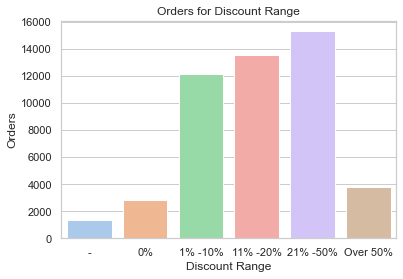

In [418]:
plt.plot(figsize=(12, 10))
colors = sns.color_palette('pastel')[0:6]
sns.barplot(data=discount_range_orders, x='discount_range', y='id_order', palette=colors)
plt.title('Orders for Discount Range')
plt.xlabel('Discount Range')
plt.ylabel('Orders')
plt.show()

<h><strong>4.Which discount range segment brings more revenue?</strong></h>

In [419]:
discount_range_revenue=orderlines_products_orders_sabrina.query('state=="Completed"')

In [420]:
discount_range_revenue=discount_range_revenue.query('year=="2017"')

In [421]:
discount_range_revenue=discount_range_revenue.groupby('discount_range').revenue.sum().reset_index()

In [422]:
discount_range_revenue=discount_range_revenue.groupby('discount_range').revenue.sum().reset_index()

In [423]:
discount_range_revenue

,discount_range,revenue
0,-,0.00
1,0%,509889.06
2,1% -10%,6397706.66
3,11% -20%,3811091.47
4,21% -50%,2834047.40
5,Over 50%,338163.80


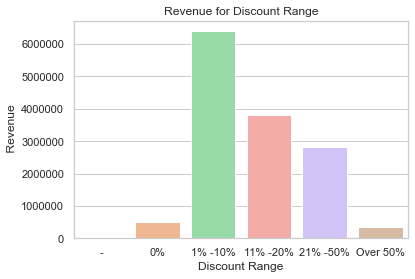

In [424]:
plt.plot(figsize=(20, 10))
colors = sns.color_palette('pastel')[0:6]
sns.barplot(data=discount_range_revenue, x='discount_range', y='revenue', palette=colors)
plt.title('Revenue for Discount Range')
plt.xlabel('Discount Range')
plt.ylabel(' Revenue')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

<h><strong>5.Is there a correlation between discount and Orders completed? </strong></h>

In [425]:
discount_range_orders_completed_correlation=orderlines_products_orders_sabrina.query('year=="2017"')

In [426]:
discount_range_orders_completed_correlation=discount_range_orders_completed_correlation.groupby(['discount_range','state']).id_order.count().reset_index()

In [427]:
discount_range_orders_completed_correlation

,discount_range,state,id_order
0,-,Cancelled,235
1,-,Completed,1384
2,-,Pending,567
3,-,Place Order,711
4,-,Shopping Basket,3642
5,0%,Cancelled,610
6,0%,Completed,2829
7,0%,Pending,1222
8,0%,Place Order,2349
9,0%,Shopping Basket,11868


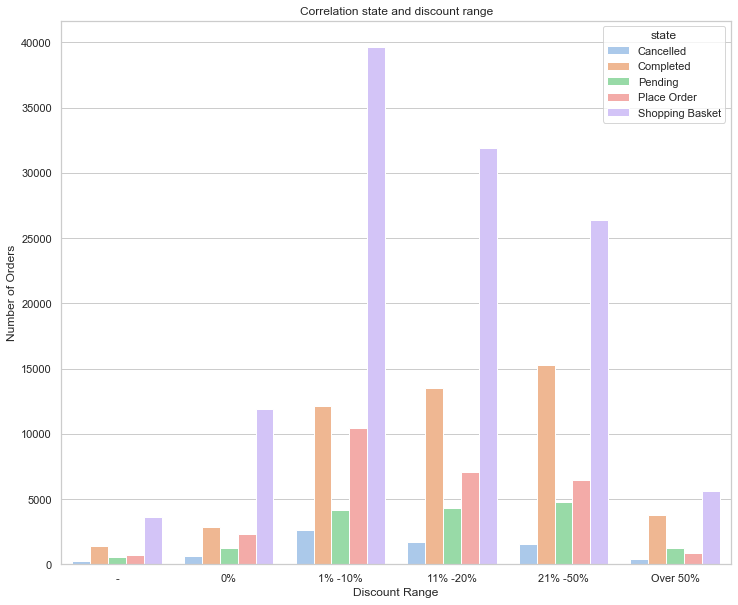

In [428]:
plt.subplots(figsize=(12, 10))
colors = sns.color_palette('pastel')[0:6]
sns.barplot(data=discount_range_orders_completed_correlation,x='discount_range', y='id_order', hue='state',palette=colors)
plt.xlabel('Discount Range') 
plt.ylabel('Number of Orders') 
plt.title('Correlation state and discount range') 
plt.ticklabel_format(style='plain', axis='y') 
plt.show() 

<h><strong>6.Is there a correlation between discount and number of orders? </strong></h>